<center><h1 style="color:#00A63F; font-size: 34px;"><b> Sales Forecasting for Walmart Retail Stores</b></h1></center>


## Importing important libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


pd.options.display.float_format = '{:.2f}'.format

## Loading the DataFrame

In [2]:
df = pd.read_csv('/Users/tathagatasharma/Downloads/Walmart.csv')

# <a>a. Problem Statement
</a>

### A retail store with multiple outlets across the country is facing challenges in managing its inventory to match demand with supply. The company aims to utilize its historical sales data to gain insights into factors affecting sales and to forecast sales for upcoming months.

# <a>b. Project Objective</a>

### 1. To analyze the historical sales data, identify patterns, and generate useful insights that can help each store improve in various areas, such as inventory management, pricing, and promotional strategies.
### 2. To develop a prediction model that can accurately forecast the sales for each store for the next 12 weeks, enabling the stores to better manage their inventory, avoid stockouts, and minimize overstocking.

# <a>c. Data Description</a>

### The dataset provided, walmart.csv, contains 6435 rows and 8 columns with the following information:

* Store: Store number (integer)
* Date: Week of sales (date)
* Weekly_Sales: Sales for the given store in that week (float)
* Holiday_Flag: Indicates if it is a holiday week (boolean; 1 = holiday week, 0 = non-holiday week)
* Temperature: Temperature on the day of the sale (float; in Fahrenheit)
* Fuel_Price: Cost of fuel in the region (float; in US dollars)
* CPI: Consumer Price Index (float)
* Unemployment: Unemployment rate (float)

# <a> d. Data Pre-processing Steps and Inspiration</a>


* Now we will be performing EDA, Data Cleaning and Feature Engineernig on our DataSet

# 1. Exploratory Data analysis

## How big is the data

In [3]:
df.shape

(6435, 8)

## How does the data looks

In [4]:
# set display option to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df.head(10)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31        2.57   
1      1  12-02-2010    1641957.44             1        38.51        2.55   
2      1  19-02-2010    1611968.17             0        39.93        2.51   
3      1  26-02-2010    1409727.59             0        46.63        2.56   
4      1  05-03-2010    1554806.68             0        46.50        2.62   
5      1  12-03-2010    1439541.59             0        57.79        2.67   
6      1  19-03-2010    1472515.79             0        54.58        2.72   
7      1  26-03-2010    1404429.92             0        51.45        2.73   
8      1  02-04-2010    1594968.28             0        62.27        2.72   
9      1  09-04-2010    1545418.53             0        65.86        2.77   

     CPI  Unemployment  
0 211.10          8.11  
1 211.24          8.11  
2 211.29          8.11  
3 211.32          8.11  
4 211.35          8.11  
5 211.38          8.11  
6 211.22          8.11  
7 211.02          8.11  
8 210.82          7.81  
9 210.62          7.81

## What is the datatype of columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# 2. Data Cleaning

## Is there any missing values

In [6]:
#checking missing values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

## checking for duplicate values

In [7]:

df.duplicated().sum()

0

## How does the data look mathematically

In [8]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price     CPI  \
count 6435.00       6435.00       6435.00      6435.00     6435.00 6435.00   
mean    23.00    1046964.88          0.07        60.66        3.36  171.58   
std     12.99     564366.62          0.26        18.44        0.46   39.36   
min      1.00     209986.25          0.00        -2.06        2.47  126.06   
25%     12.00     553350.10          0.00        47.46        2.93  131.74   
50%     23.00     960746.04          0.00        62.67        3.44  182.62   
75%     34.00    1420158.66          0.00        74.94        3.73  212.74   
max     45.00    3818686.45          1.00       100.14        4.47  227.23   

       Unemployment  
count       6435.00  
mean           8.00  
std            1.88  
min            3.88  
25%            6.89  
50%            7.87  
75%            8.62  
max           14.31

## What is the corelation between the variables

In [9]:
df.corr()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Store          1.00         -0.34         -0.00        -0.02        0.06   
Weekly_Sales  -0.34          1.00          0.04        -0.06        0.01   
Holiday_Flag  -0.00          0.04          1.00        -0.16       -0.08   
Temperature   -0.02         -0.06         -0.16         1.00        0.14   
Fuel_Price     0.06          0.01         -0.08         0.14        1.00   
CPI           -0.21         -0.07         -0.00         0.18       -0.17   
Unemployment   0.22         -0.11          0.01         0.10       -0.03   

               CPI  Unemployment  
Store        -0.21          0.22  
Weekly_Sales -0.07         -0.11  
Holiday_Flag -0.00          0.01  
Temperature   0.18          0.10  
Fuel_Price   -0.17         -0.03  
CPI           1.00         -0.30  
Unemployment -0.30          1.00

# 3. Feature Engineering

### Converting Date column to datetime DataType as it was an object DataType

In [10]:
#Converting Date column to datetime DataType as it was an object DataType

# df['Date']= pd.to_datetime(df['Date'])

df["Date"] = pd.to_datetime(df["Date"], format='%d-%m-%Y') # convert to datetime
df['week'] =df['Date'].dt.week
df['month'] =df['Date'].dt.month 
df['year'] =df['Date'].dt.year

/var/folders/qs/7qh7v2nx4395hvhh_9hx3clm0000gn/T/ipykernel_51542/2331948250.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] =df['Date'].dt.week


### checking datatype for Date column and new columns (week,month,year)

In [11]:
# checking datatype for Date column and new columns (week,month,year)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   week          6435 non-null   int64         
 9   month         6435 non-null   int64         
 10  year          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 553.1 KB


### Now our data has 3 new columns(week, month, year) for our Time Series analysis 

In [12]:
df.head(10)

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31        2.57   
1      1 2010-02-12    1641957.44             1        38.51        2.55   
2      1 2010-02-19    1611968.17             0        39.93        2.51   
3      1 2010-02-26    1409727.59             0        46.63        2.56   
4      1 2010-03-05    1554806.68             0        46.50        2.62   
5      1 2010-03-12    1439541.59             0        57.79        2.67   
6      1 2010-03-19    1472515.79             0        54.58        2.72   
7      1 2010-03-26    1404429.92             0        51.45        2.73   
8      1 2010-04-02    1594968.28             0        62.27        2.72   
9      1 2010-04-09    1545418.53             0        65.86        2.77   

     CPI  Unemployment  week  month  year  
0 211.10          8.11     5      2  2010  
1 211.24          8.11     6      2  2010  
2 211.29          8.11     7      2  2010  
3 211.32          8.11     8      2  2010  
4 211.35          8.11     9      3  2010  
5 211.38          8.11    10      3  2010  
6 211.22          8.11    11      3  2010  
7 211.02          8.11    12      3  2010  
8 210.82          7.81    13      4  2010  
9 210.62          7.81    14      4  2010

## Calculating the mean weekly sales for each month

In [13]:
df.groupby('month')['Weekly_Sales'].mean()

month
1     923884.55
2    1053199.80
3    1013309.23
4    1026761.56
5    1031714.02
6    1064324.59
7    1031747.58
8    1048017.45
9     989335.35
10    999632.12
11   1147265.90
12   1281863.63
Name: Weekly_Sales, dtype: float64

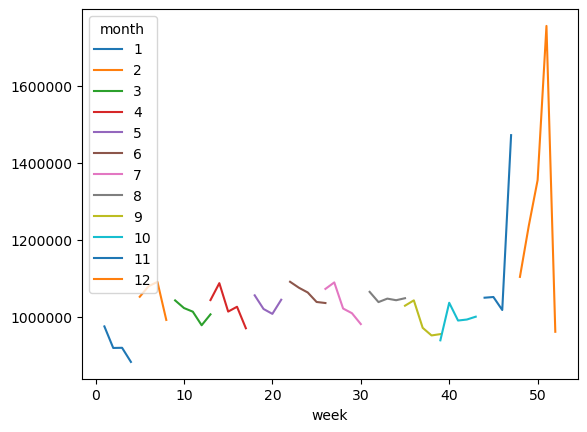

In [14]:
# Create a pivot table to calculate monthly sales, with months as columns and weeks as index
monthly_sales = pd.pivot_table(df, values="Weekly_Sales", columns="month", index="week")

# Plot the monthly sales with non-scientific notation
monthly_sales.plot()

# Set the y-axis tick labels to use non-scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Display the plot
plt.show()


# 4. Bi-Variate Analysis

* Now we will be analysing Weekly_sales column with many other columns to understand their effect on each other

### Grouping the Dataset by year to see the best years for sales

In [15]:
df.groupby('year')['Weekly_Sales'].mean() # to see the best years for sales

year
2010   1059669.50
2011   1046239.32
2012   1033660.39
Name: Weekly_Sales, dtype: float64

### Visualising mean of Weekly_Sales column for each year to check the best year for sales

<AxesSubplot:xlabel='month'>

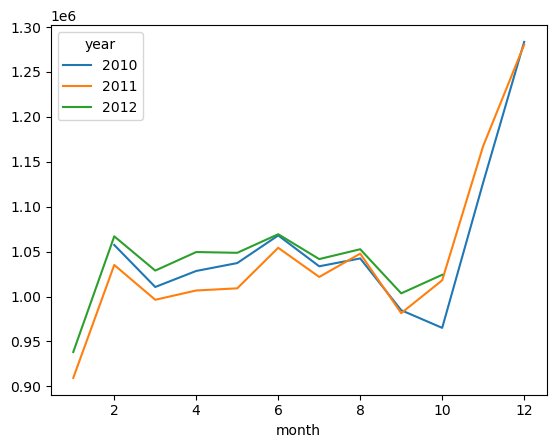

In [16]:
yearly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
yearly_sales.plot()

* Here we can see that year 2011 and 2012 performed better than year 2012 and during November to December there is a surge in Sales, its mostly due to the Holiday Season around Christmas

### Visualising a barplot showing relationship between month and weekly_sales

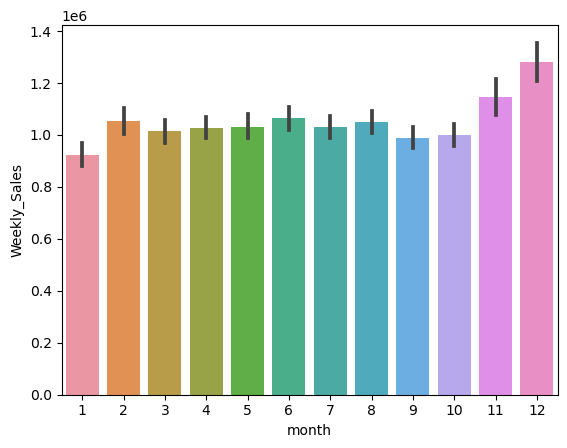

In [17]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=df)


### Visualising a barplot showing relationship between weeks and weekly_sales

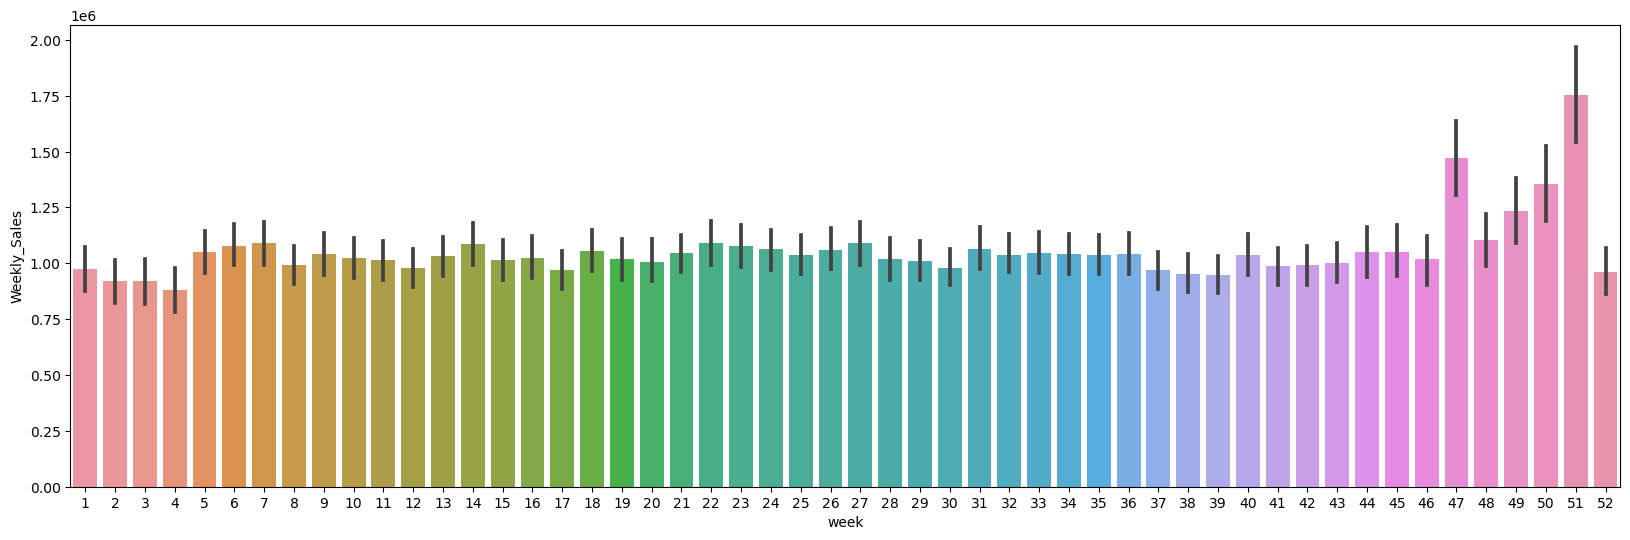

In [18]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=df)

### Checking count of Holiday Flag

In [19]:
df['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

### Checking count of Stores for which we need to predict the future sales

In [20]:
df['Store'].value_counts().sort_index()

1     143
2     143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
22    143
23    143
24    143
25    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
45    143
Name: Store, dtype: int64

* so we have total 45 stores and for each store we have 143 records which is enough for performing our future prediction

### Checking for the mininum value for weekly_sales

In [21]:
df['Weekly_Sales'].min()

209986.25

### Checking for the maximum value for weekly sales

In [22]:
df['Weekly_Sales'].max()

3818686.45

### Visualising a barplot showing relationship between all 45 Stores and weekly_sales, with hue on Holiday_Flag

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

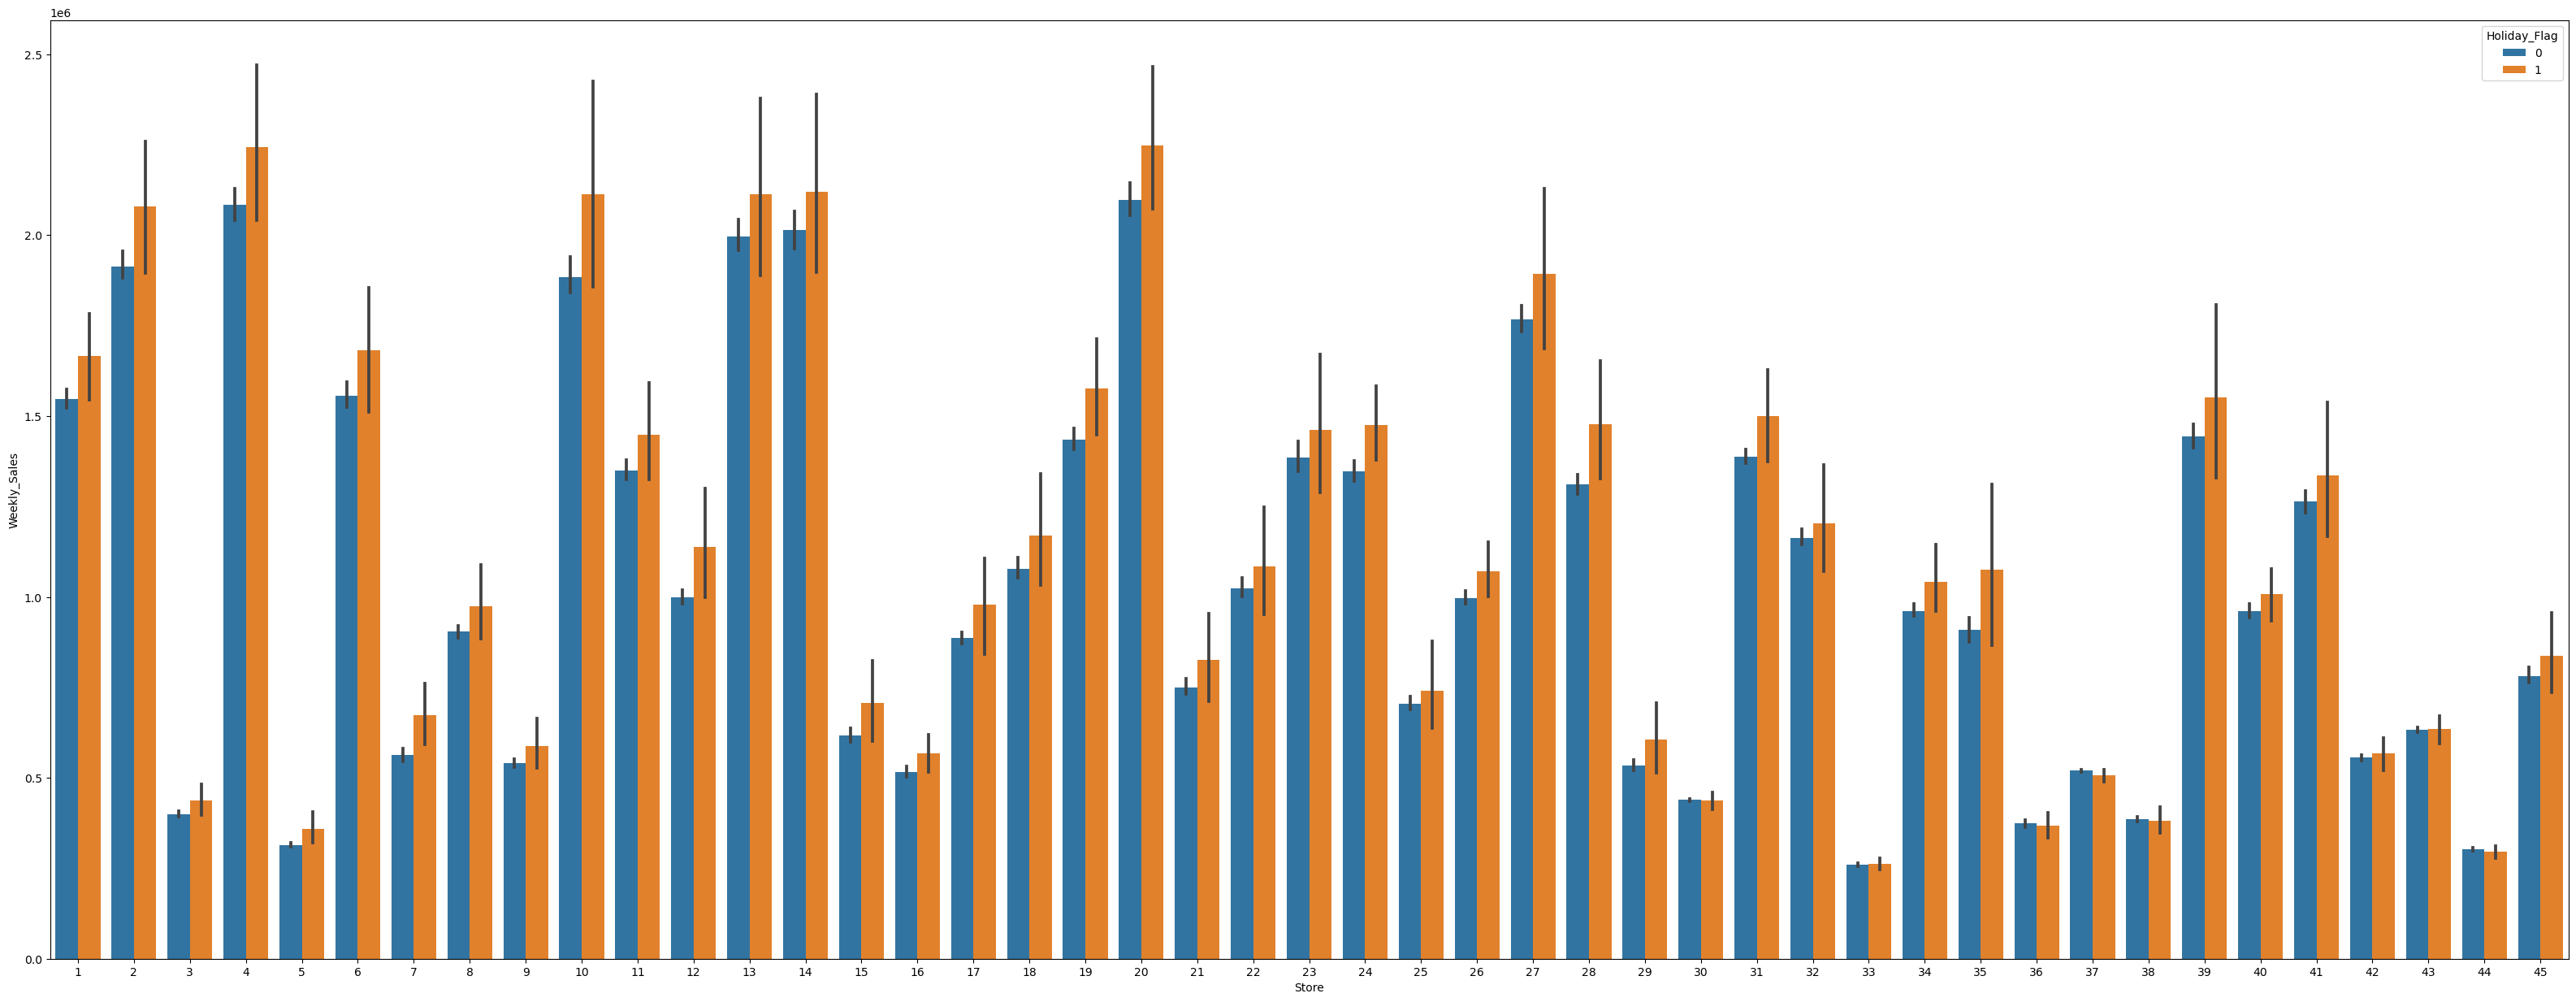

In [52]:
plt.figure(figsize=(40,15))
sns.barplot(x='Store', y='Weekly_Sales', data=df, hue = df['Holiday_Flag'])

* From the above data for all the 45 Stores we can see that there is a slight inclrease in Sales if the holidayFlag is 1.

## Creating a count plot to visualize the distribution of the "Holiday_Flag" column in the DataFrame df using seaborn (sns).

## Count the occurrences of each value in the "Holiday_Flag" column and display the counts.

/Users/tathagatasharma/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    5985
1     450
Name: Holiday_Flag, dtype: int64

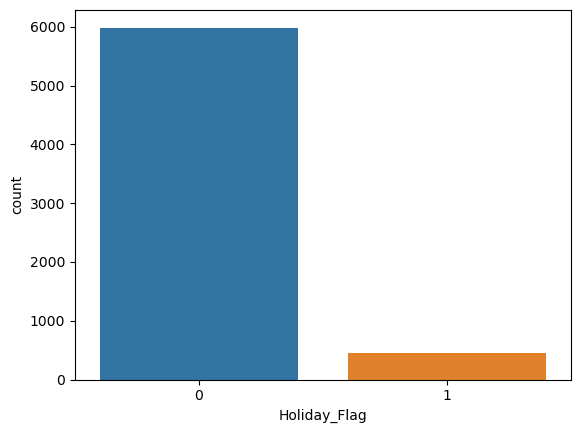

In [24]:
sns.countplot(df["Holiday_Flag"])
df["Holiday_Flag"].value_counts()

### Creating a line plot to visualize the relationship between 'week' and 'Weekly_Sales' columns in the DataFrame df using seaborn (sns).

### The 'hue' parameter is used to differentiate the lines based on the values in the 'Holiday_Flag' column.

/Users/tathagatasharma/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='week', ylabel='Weekly_Sales'>

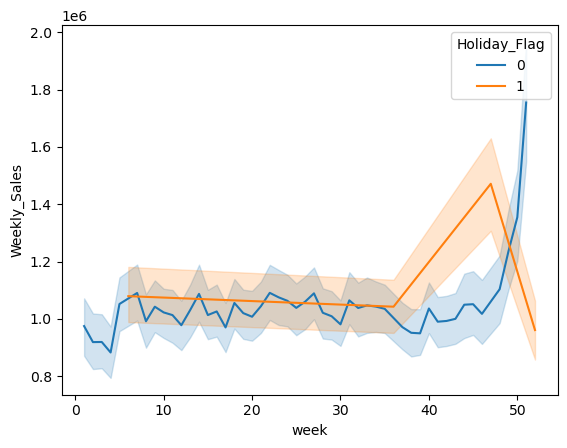

In [25]:
sns.lineplot(df['week'],df['Weekly_Sales'], hue = df['Holiday_Flag'])

### Counting the occurrences of each unique date in the 'Date' column of the DataFrame df and showing the counts.


In [26]:
df['Date'].value_counts()

2010-02-05    45
2011-12-23    45
2011-11-11    45
2011-11-18    45
2011-11-25    45
2011-12-02    45
2011-12-09    45
2011-12-16    45
2011-12-30    45
2011-10-28    45
2012-01-06    45
2012-01-13    45
2012-01-20    45
2012-01-27    45
2012-02-03    45
2012-02-10    45
2011-11-04    45
2011-10-21    45
2012-02-24    45
2011-08-19    45
2011-07-08    45
2011-07-15    45
2011-07-22    45
2011-07-29    45
2011-08-05    45
2011-08-12    45
2011-08-26    45
2011-10-14    45
2011-09-02    45
2011-09-09    45
2011-09-16    45
2011-09-23    45
2011-09-30    45
2011-10-07    45
2012-02-17    45
2012-03-02    45
2011-06-24    45
2012-08-31    45
2012-07-20    45
2012-07-27    45
2012-08-03    45
2012-08-10    45
2012-08-17    45
2012-08-24    45
2012-09-07    45
2012-07-06    45
2012-09-14    45
2012-09-21    45
2012-09-28    45
2012-10-05    45
2012-10-12    45
2012-10-19    45
2012-07-13    45
2012-06-29    45
2012-03-09    45
2012-04-27    45
2012-03-16    45
2012-03-23    45
2012-03-30    

* Here we can see the value count for each date is 45 which shows that we have an equally distributed dataset in which we have record for each store for any particular date

### Create a figure with a size of 10x8 inches to plot a heatmap of the correlation matrix of the DataFrame df.

### then, Generating a heatmap using seaborn (sns) to visualize the correlation matrix of the DataFrame df.
### The 'annot=True' argument displays the correlation values on the heatmap.
### The 'cmap='inferno'' argument sets the color map to 'inferno' for the heatmap.


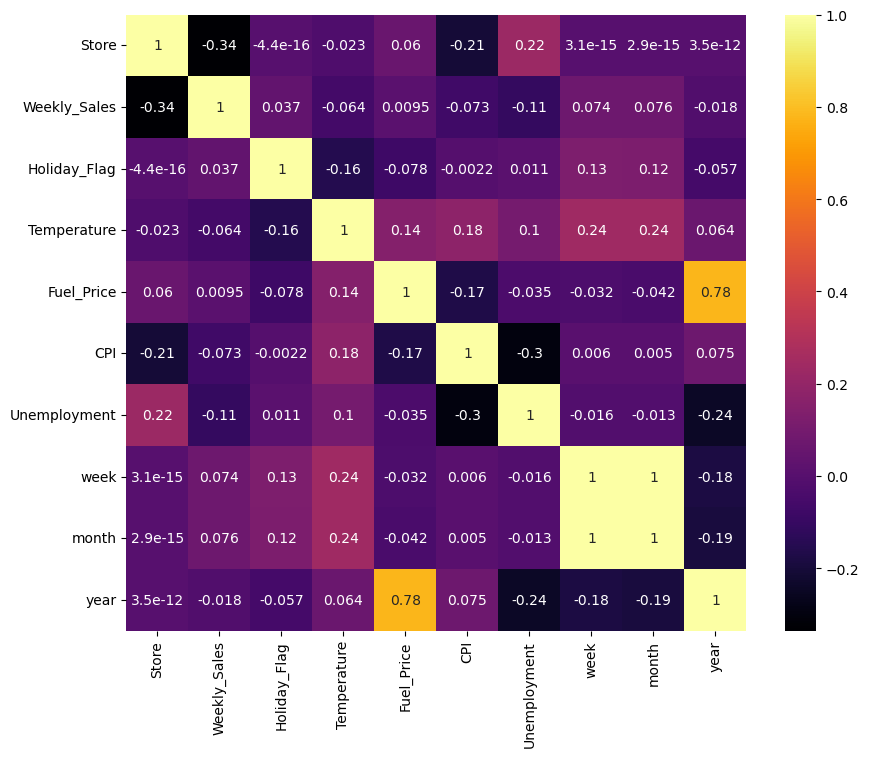

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'inferno')
plt.show()

### Creating a figure with a size of 10x8 inches to plot a pairwise scatter plot of the DataFrame df.

### Generating a pairwise scatter plot using seaborn's pairplot function.
### The 'kind="scatter"' argument specifies that a scatter plot should be created.
### The 'hue="Holiday_Flag"' argument colors the data points based on the values in the "Holiday_Flag" column

<Figure size 1000x800 with 0 Axes>

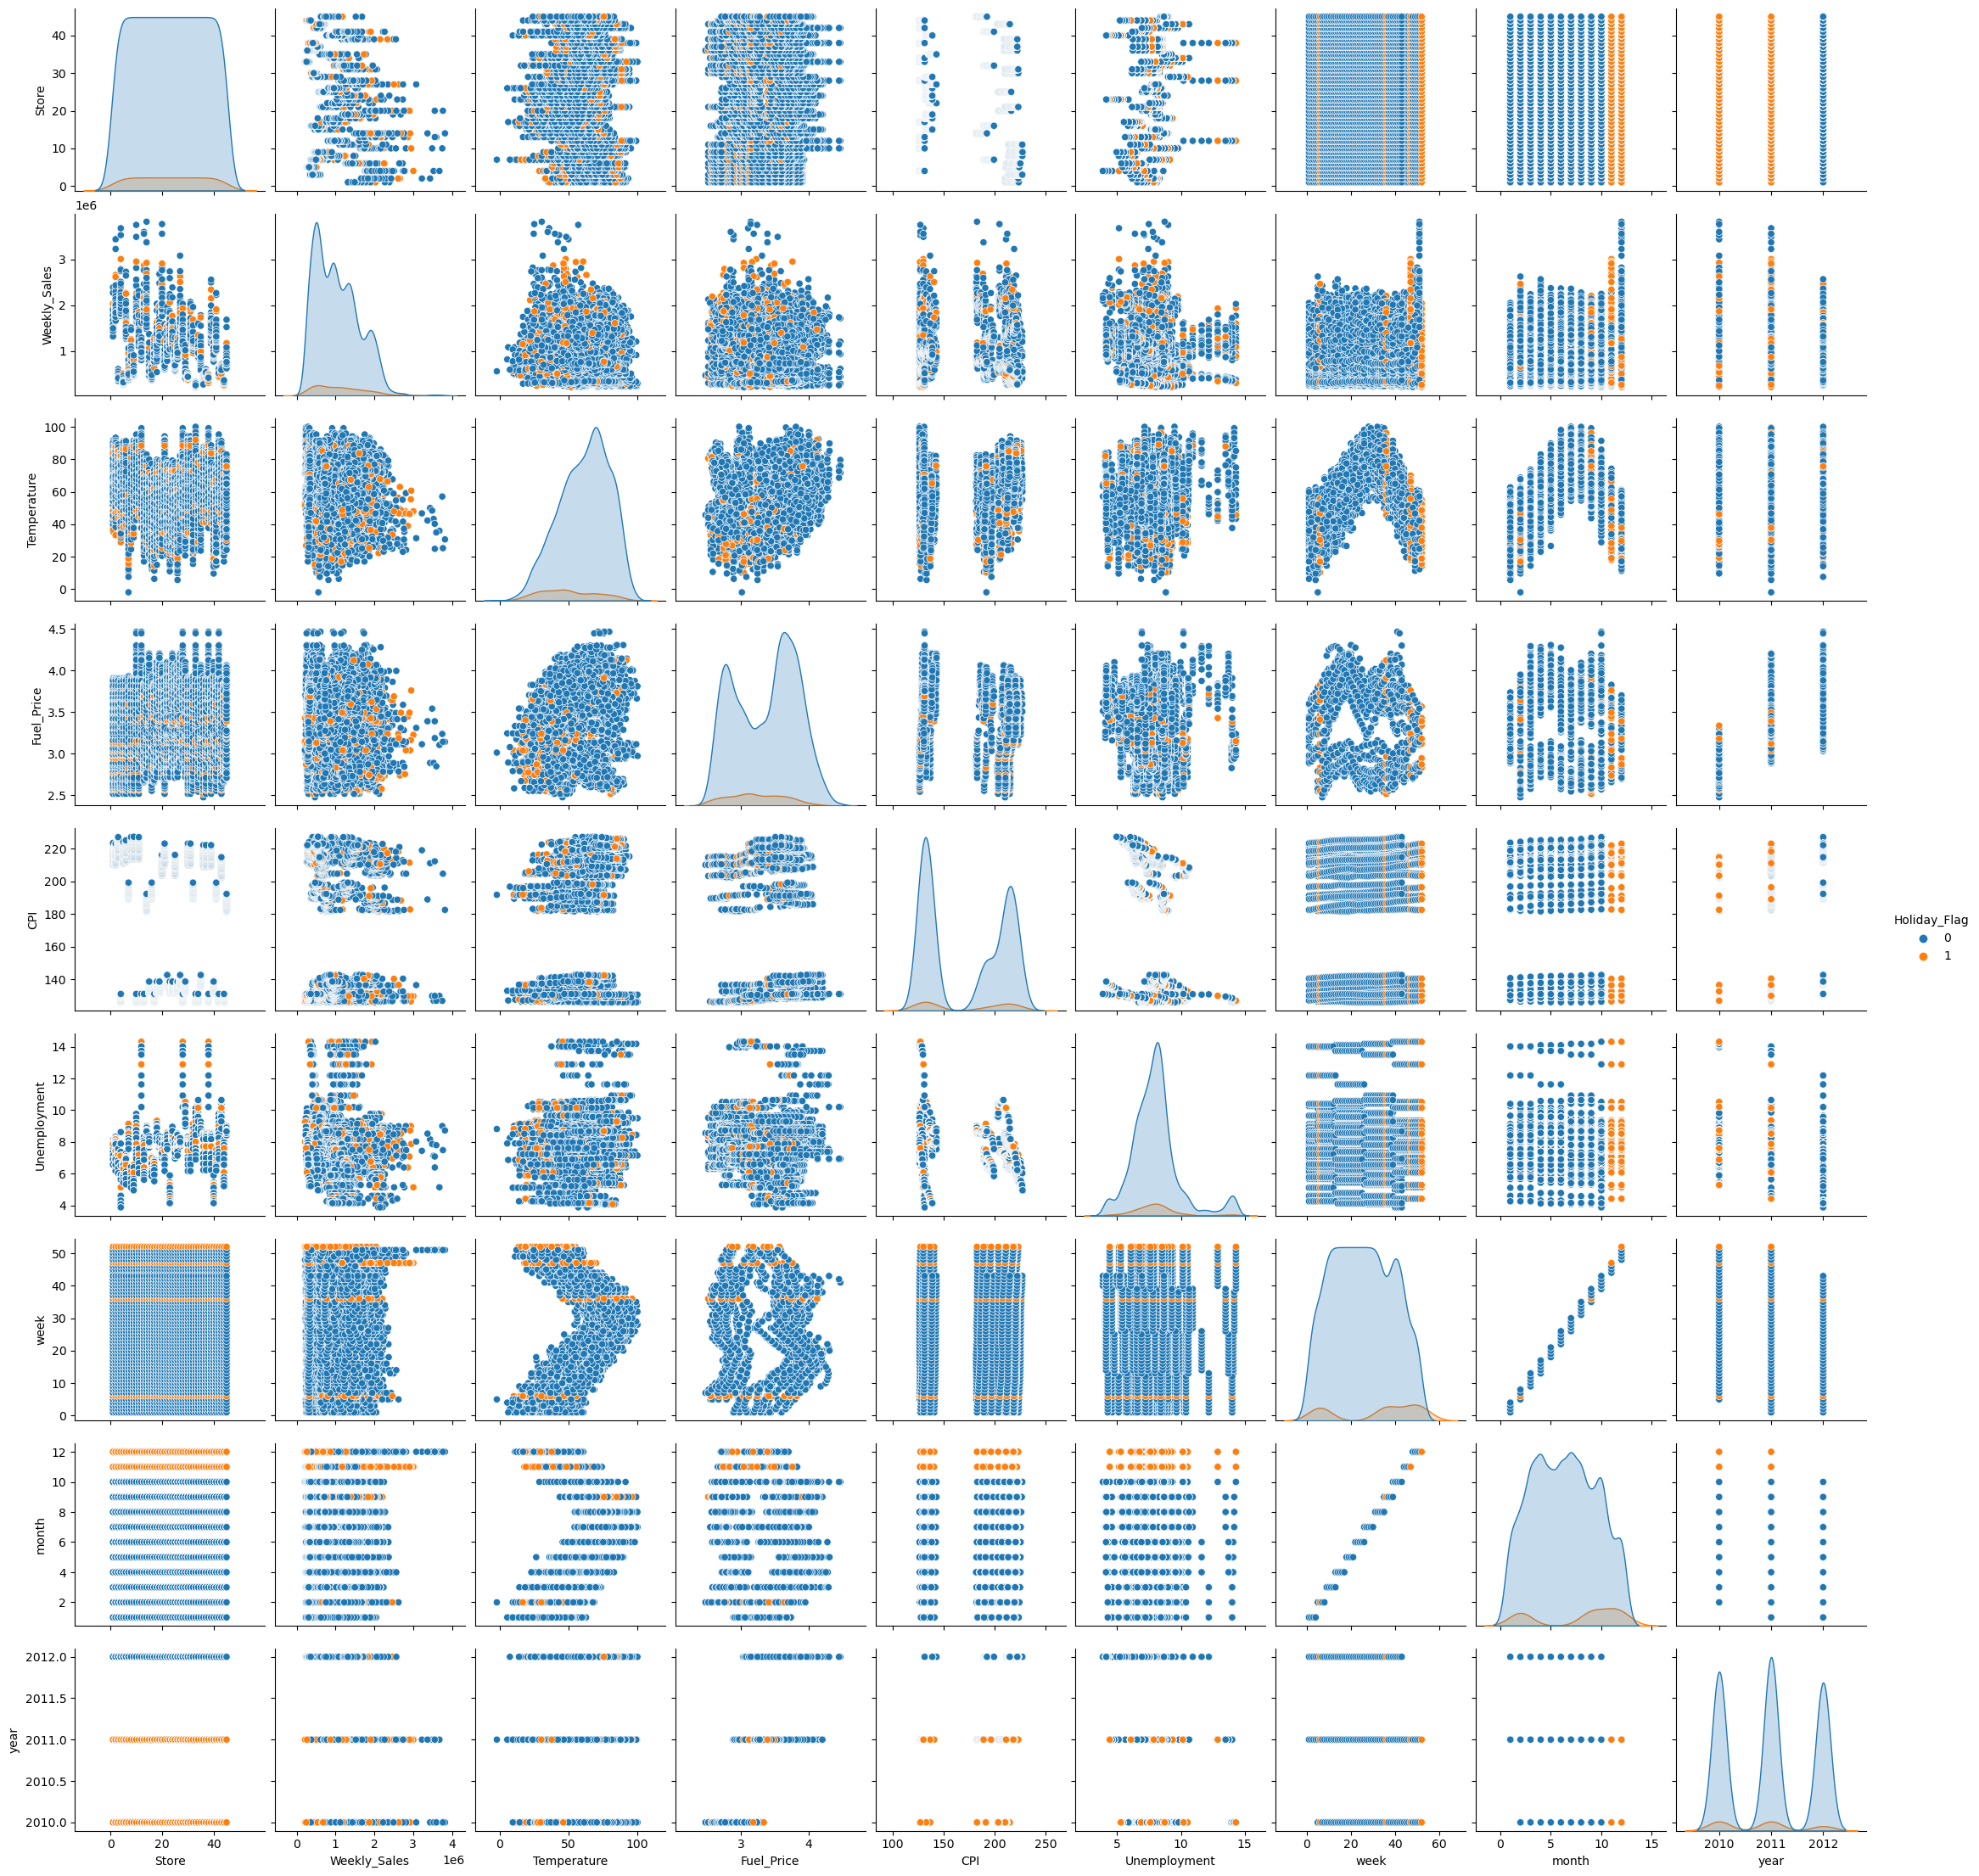

In [28]:
plt.figure(figsize=(10,8))
sns.pairplot(df, kind="scatter", hue = 'Holiday_Flag')
plt.show()

### Creating a figure with a size of 10x8 inches to plot a pairwise scatter plot of the DataFrame df with regression lines.

### Generating a pairwise scatter plot with regression lines using seaborn's pairplot function.
### The 'kind="reg"' argument specifies that regression lines should be included in the scatter plots.
### The 'hue="Holiday_Flag"' argument colors the data points based on the values in the "Holiday_Flag" column.

<Figure size 1000x800 with 0 Axes>

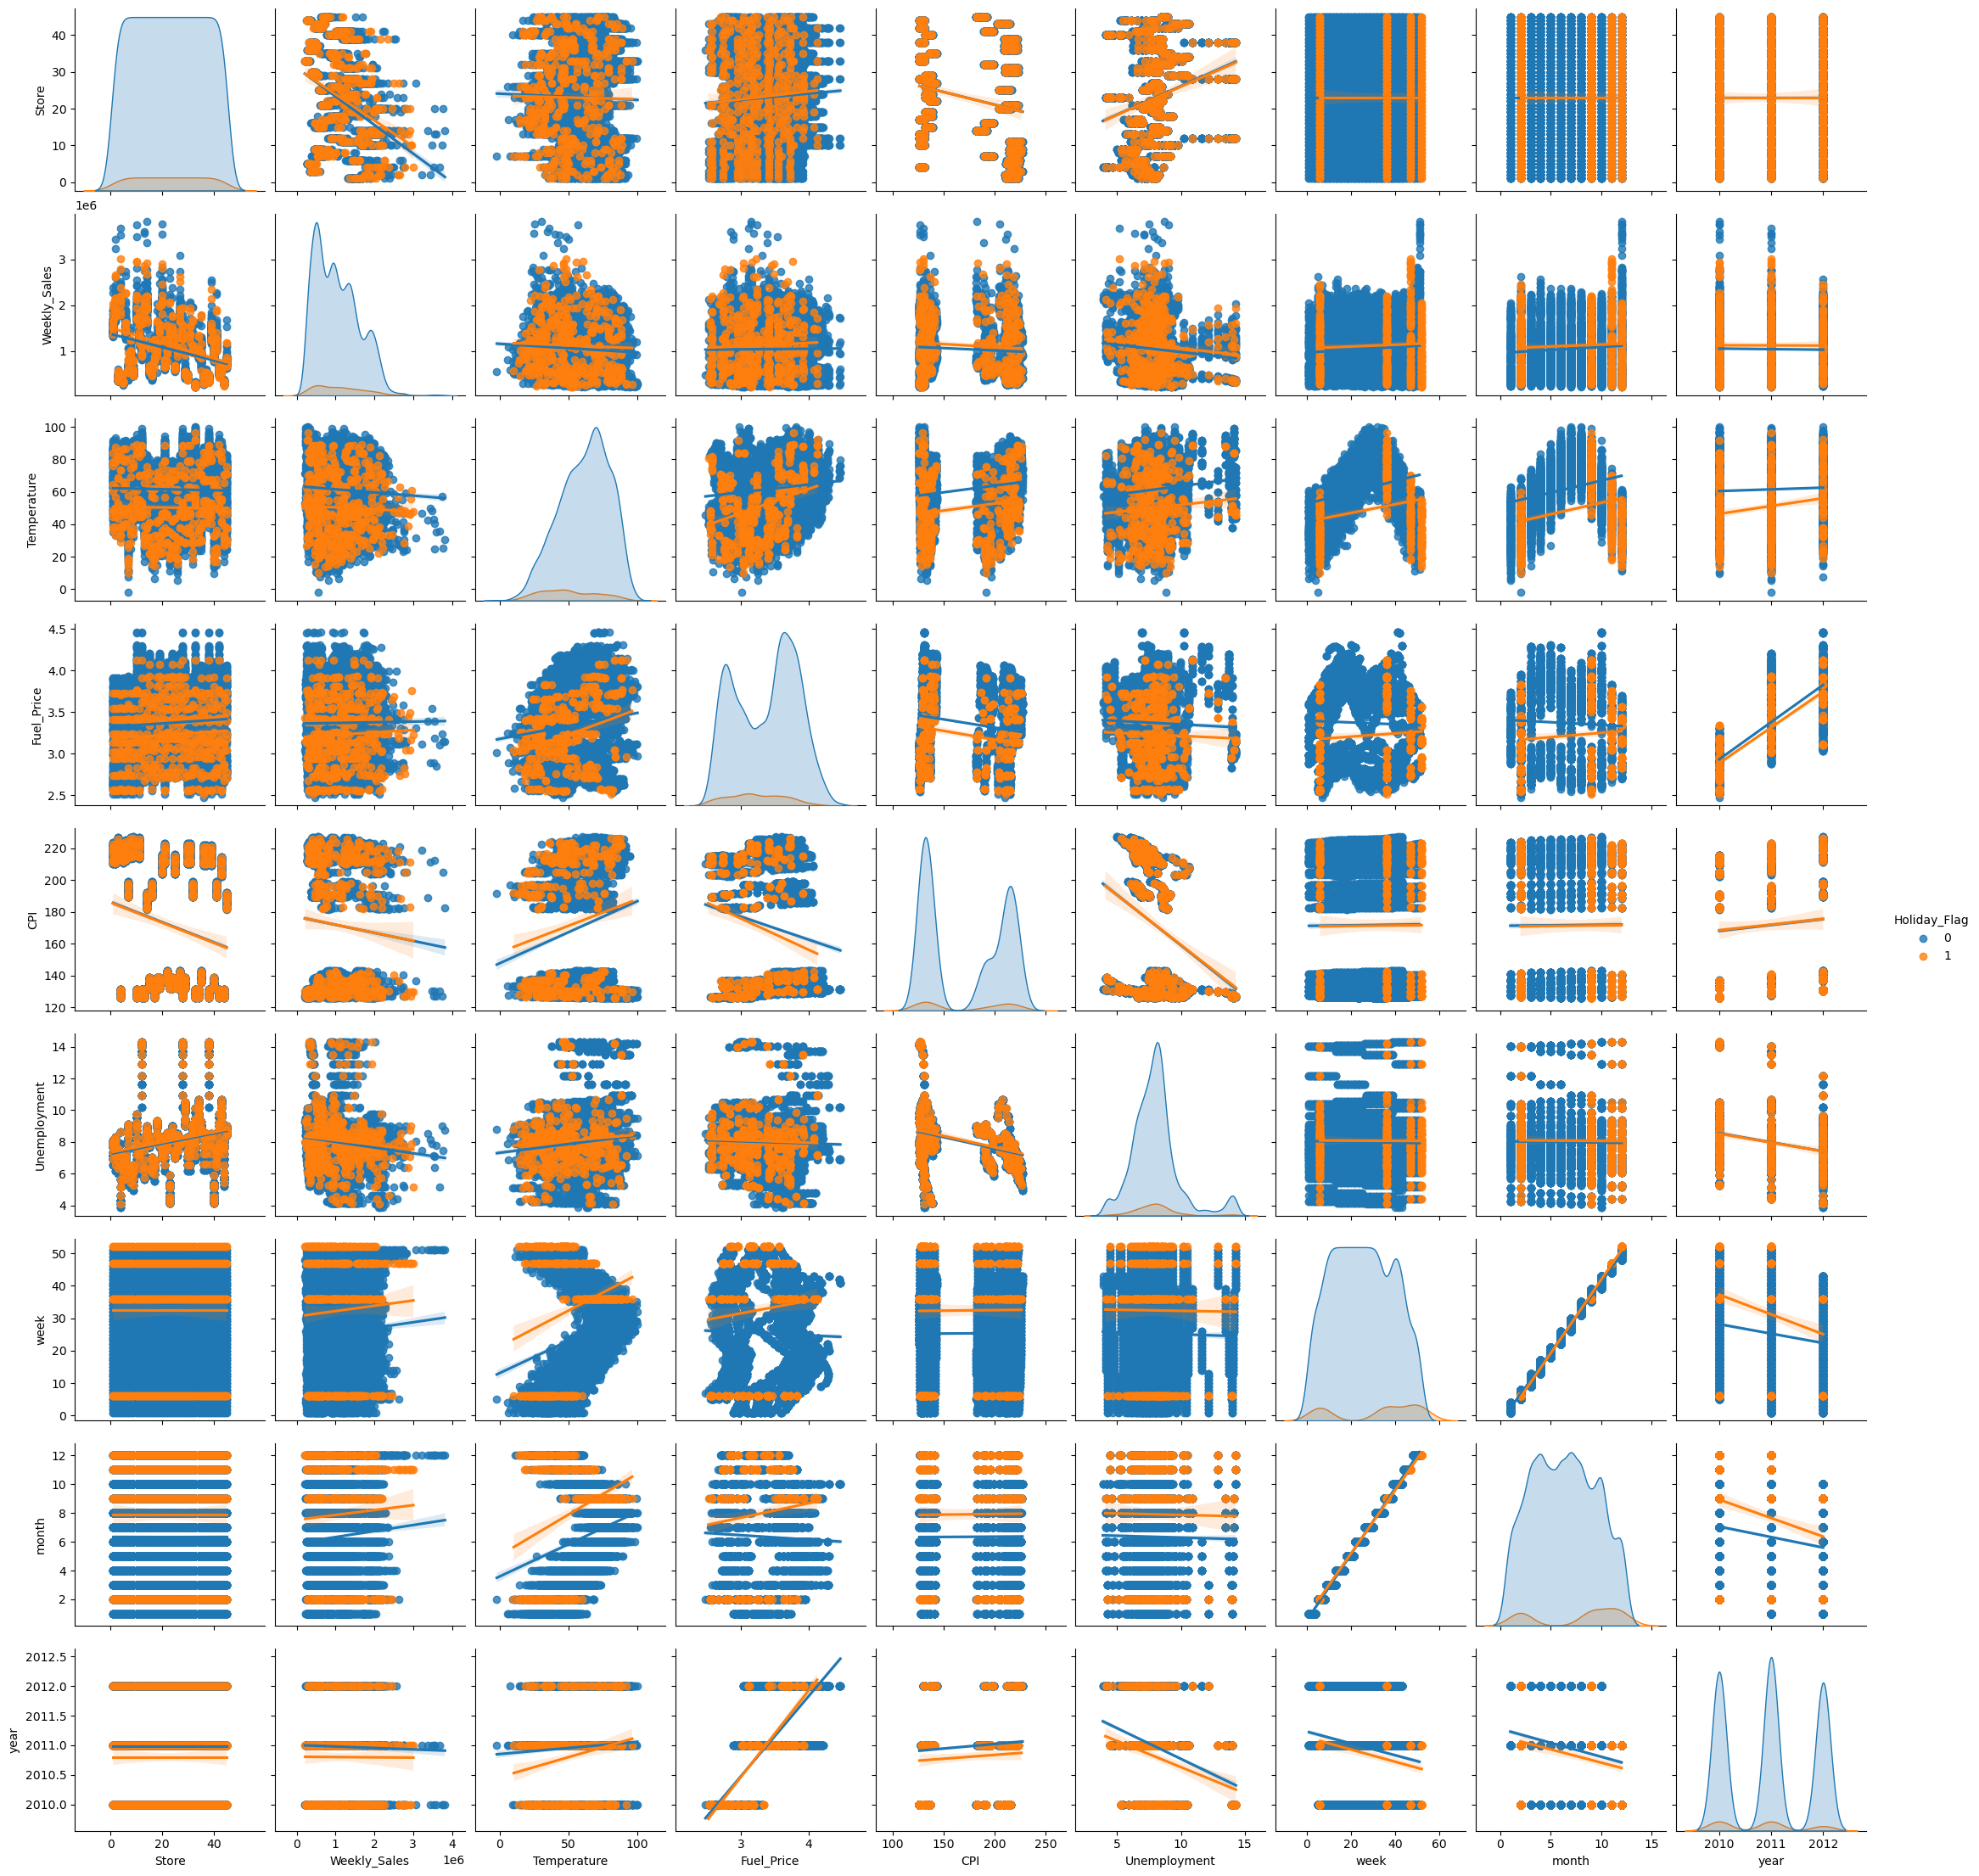

In [29]:
plt.figure(figsize=(10,8))
sns.pairplot(df, kind = 'reg', hue = 'Holiday_Flag')
plt.show()

### From the above heatmap and pairplots we can conclude that there is no such strong correlation between Weekly_sales with any of the other Values.

# <a> e. Choosing the Algorithm for the Project
</a>


* To choose an appropriate algorithm for the project, several factors need to be considered. These factors include the nature of the problem, available data, desired output, and performance requirements. Since the problem involves forecasting sales for a retail store, a time series forecasting algorithm would be suitable.

* Possible algorithms for time series forecasting include:

1) ARIMA (Autoregressive Integrated Moving Average): ARIMA models are commonly used for time series forecasting. They can capture both the autoregressive (AR) and moving average (MA) components of the data and handle seasonality and trends.

2) SARIMA (Seasonal ARIMA): SARIMA models extend ARIMA models to include seasonality. They are suitable for datasets with recurring patterns over specific time intervals, such as weekly sales data.

# <a> f. Motivation and Reasons For Choosing the Algorithm
</a>

* Motivation and Reasons For Choosing the Algorithm:

* The motivation behind choosing the ARIMA and SARIMAX models for the inventory management project is based on their effectiveness in handling time series data and their ability to capture both the autoregressive (AR) and moving average (MA) components, as well as seasonality.

1. ARIMA (Autoregressive Integrated Moving Average):
* ARIMA models are widely used in time series forecasting due to their capability to capture the dependencies and patterns present in the data. By considering the historical sales data, ARIMA models can identify and leverage autoregressive relationships, moving average effects, and trends to make accurate predictions. These models are particularly suitable when the data does not exhibit clear seasonality.

2. SARIMAX (Seasonal ARIMA with Exogenous Variables):
* SARIMAX models extend the capabilities of ARIMA models by incorporating the influence of exogenous variables, such as holidays, temperature, fuel prices, CPI, and unemployment. In the context of the retail store's inventory management, these factors can significantly impact sales. By including exogenous variables, SARIMAX models can effectively capture both the seasonal and non-seasonal components of the data, resulting in more accurate sales forecasts.

* The choice of ARIMA and SARIMAX models for this project is driven by their well-established theoretical foundations and proven performance in time series forecasting tasks. Additionally, these models offer interpretability, allowing stakeholders to understand the factors influencing sales predictions and make informed decisions based on the forecasted results.

* By utilizing ARIMA and SARIMAX models, the project aims to leverage the historical sales data and the impact of exogenous variables to provide accurate sales forecasts, enabling better inventory management decisions and efficient matching of demand with supply.

# <a> g. Assumptions

</a>

Assumptions:

In the context of the inventory management project and the chosen ARIMA and SARIMAX models, the following assumptions were made:

1. Stationarity: It is assumed that the time series data used for modeling is stationary. Stationarity implies that the statistical properties of the data, such as mean and variance, remain constant over time. Stationarity is important for ARIMA and SARIMAX models, as they assume that the underlying time series is stationary or can be transformed into a stationary series.

2. Linearity: The models assume a linear relationship between the predictors (exogenous variables) and the response variable (sales). It is assumed that the impact of the exogenous variables on sales is additive and follows a linear pattern.

3. Absence of significant outliers: The models assume that the time series data does not contain significant outliers that could heavily influence the forecasted sales values. Outliers can distort the pattern and affect the accuracy of the forecasts.

4. Independence: The models assume that the observations in the time series are independent of each other. This assumption implies that the sales in one week do not depend on the sales in the previous or future weeks.

5. No seasonality in residuals: The models assume that there is no remaining seasonality or pattern in the residuals (the difference between the actual sales and the predicted values) after applying the ARIMA or SARIMAX models. If seasonality persists in the residuals, it indicates that the models are not capturing all the underlying patterns and adjustments may be required.

6. Adequate training data: The assumption is that the available historical sales data is sufficient and representative to capture the patterns and relationships required for accurate forecasting. Insufficient or biased training data may lead to suboptimal performance of the models.

These assumptions provide a foundation for the application of ARIMA and SARIMAX models in the inventory management project. It is essential to assess the validity of these assumptions and consider their potential impact on the accuracy of the sales forecasts.